In [23]:
import numpy as np
from scipy.stats import chisquare, norm,poisson

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号 

# $\chi^2$-test

In [2]:
# A example for good chi square test
f_exp = np.array([44, 50, 52, 38])
f_obs = np.array([43,52,54,40])

f_exp = f_exp/f_exp.sum()*f_obs.sum()
abs(f_exp.sum() - f_obs.sum())<1e-6
print(chisquare(f_obs,f_exp))

Power_divergenceResult(statistic=0.14510098089045517, pvalue=0.9859233956543701)


$\chi^2$ 过检验，统计量很小，p值很大。p值的含义是假设成立（零假设：观测符合预测）的情况下，观测者发生的可能性。p值很大，代表当前观测很有可能发生，无法拒绝零假设。

In [3]:
# A bad example for chi square test
f_exp = np.array([3, 9, 88, 3]) 
f_obs = np.array([43,52,54,40])

f_exp = f_exp/f_exp.sum()*f_obs.sum()
abs(f_exp.sum() - f_obs.sum())<1e-6
print(chisquare(f_obs,f_exp))

Power_divergenceResult(statistic=619.33063438619, pvalue=6.49624492301387e-134)


$\chi^2$ 不过检验，统计量很大，p值很小，代表当前观测很不太可能发生，拒绝零假设。

# 读取数据

In [5]:
df=pd.read_excel('Exp1.xlsx')
N_t=df['放射计数'].values
N_b=df['本底计数'].values

In [6]:
print(f'放射性计数的平均值为{N_t.mean():.2f}，样本方差为{np.var(N_t,ddof=1):.2f}')
print(f'放射性计数的平均值为{N_b.mean():.2f}，样本方差为{np.var(N_b,ddof=1):.2f}')

放射性计数的平均值为243.43，样本方差为263.03
放射性计数的平均值为5.06，样本方差为5.26


In [70]:
def get_bins(data,center,interval):
    data_max = max(data)
    data_min = min(data)
    bins = [center,]
    note = [0]
    point = center-interval
    noter = -1
    while(point>data_min):
        bins.insert(0,point)
        note.insert(0,noter)
        point-=interval
        noter-=1
    bins.insert(0,data_min)
    note.insert(0,noter-1)

    point = center+interval
    noter = 1
    while(point<data_max):
        bins.append(point)
        note.append(noter)
        point+=interval
        noter+=1
    bins.append(data_max)
    note.append(noter+1)
    return bins,note

In [98]:
bins_t ,note_t = get_bins(N_t,N_t.mean(),N_t.std(ddof = 1))
hist_t, _ = np.histogram(N_t, bins_t)
count_t = hist_t.sum()

note_t=np.array(note_t)
expe_t=np.diff(norm.cdf(note_t))
expe_t = expe_t/expe_t.sum()*count_t

chisquare(hist_t,expe_t,ddof=2)

Power_divergenceResult(statistic=5.228139651682594, pvalue=0.264679580988189)

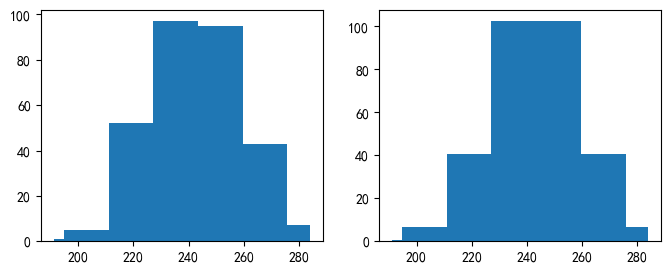

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].bar(bins_t[:-1], hist_t, width=np.diff(bins_t), align="edge")
axes[1].bar(bins_t[:-1], expe_t, width=np.diff(bins_t), align="edge")
plt.show()

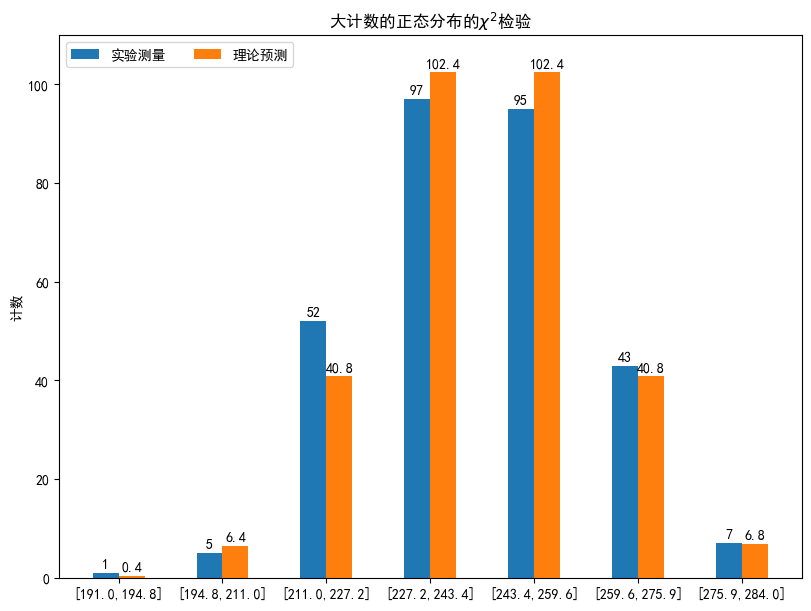

In [141]:
bins_t_int =np.around( np.array(bins_t),1)
species = [f'[{bins_t_int[i]},{bins_t_int[i+1]}]' for i in range(len(bins_t_int)-1)]
penguin_means = {
    '实验测量': hist_t,
    '理论预测': np.around(expe_t, decimals=1),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained',figsize=(8,6))

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('计数')
ax.set_title(r'大计数的正态分布的$\chi^2$检验')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)

ax.set_ylim(0, 110)

plt.show()

In [69]:
bins_b ,note_b = get_bins(N_b,N_b.mean(),N_b.std(ddof = 1))
hist_b, _ = np.histogram(N_b, bins_b)
count_b = hist_b.sum()

note_b=np.array(note_b)
expe_t=(norm.cdf(note_b+1)-norm.cdf(note_b))[:-1]*count_b